In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


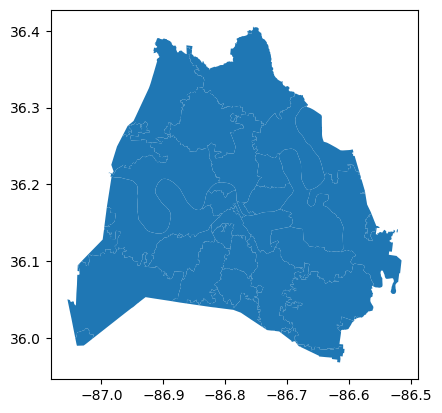

In [3]:
zipcodes.plot();

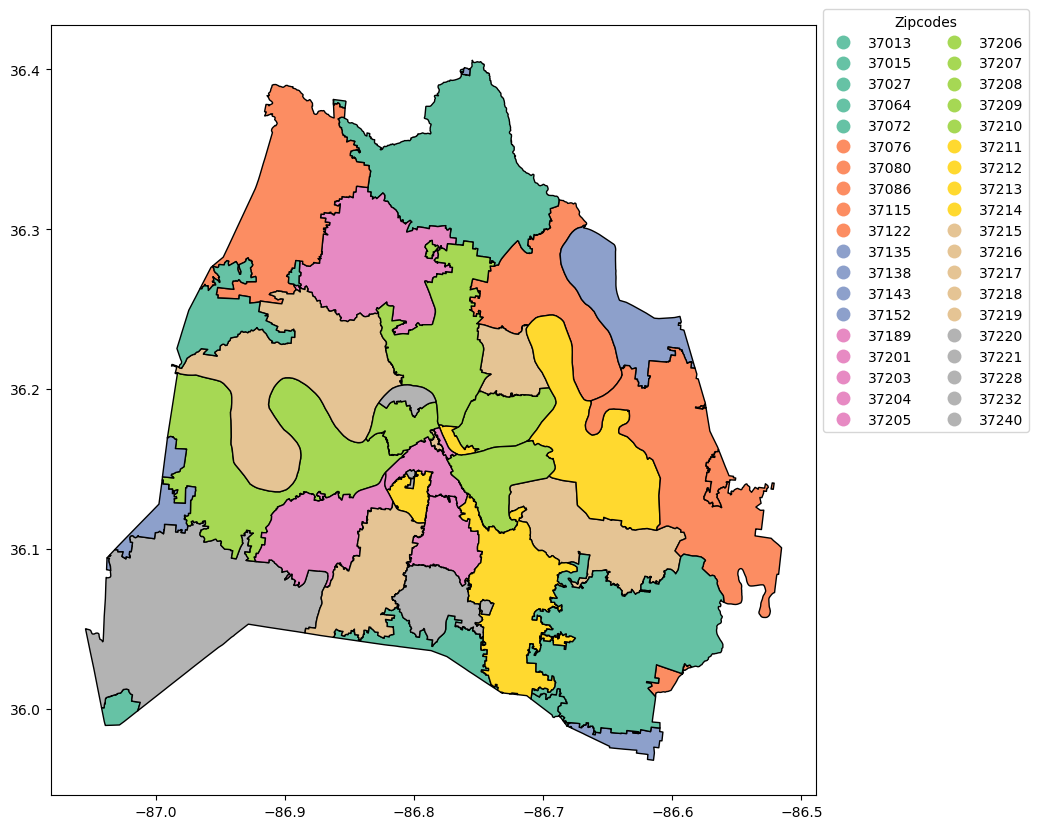

In [4]:

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [8]:
racks = gpd.read_file('../data/BikeRacks.geojson')
print(racks.crs)
racks.head( )

epsg:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [9]:
print(racks.shape)

(430, 13)


In [7]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [10]:
racks_by_zip = gpd.sjoin(racks, zipcodes, op = 'within')

C:\Users\pc\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [11]:
racks_by_zip.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,zip,po_name
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993),51,37013,ANTIOCH
140,Cole Elementary School,1,Elementary School,Public,174,141,Existing,-86.6982749997,Rack,Health Dept,36.0590833331,20,POINT (-86.69827 36.05908),51,37013,ANTIOCH
141,Antioch Middle School,0,Middle School,Public,331,142,Proposed,-86.6721262461,Rack,Health Dept,36.055141113,0,POINT (-86.67213 36.05514),51,37013,ANTIOCH
142,J E Moss Elementary School,2,Elementary School,Public,175,143,Existing,-86.6693833338,Rack,Health Dept,36.0672500001,52,POINT (-86.66938 36.06725),51,37013,ANTIOCH
143,Apollo Middle School,2,Middle School,Public,176,144,Existing,-86.6642388884,Rack,Health Dept,36.0670777782,56,POINT (-86.66424 36.06708),51,37013,ANTIOCH


In [12]:
racks_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: zip, dtype: int64

In [14]:
racks_in_37203 = racks_by_zip.loc[racks_by_zip['zip'] == '37203']
racks_in_37203.shape

(51, 16)

In [15]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

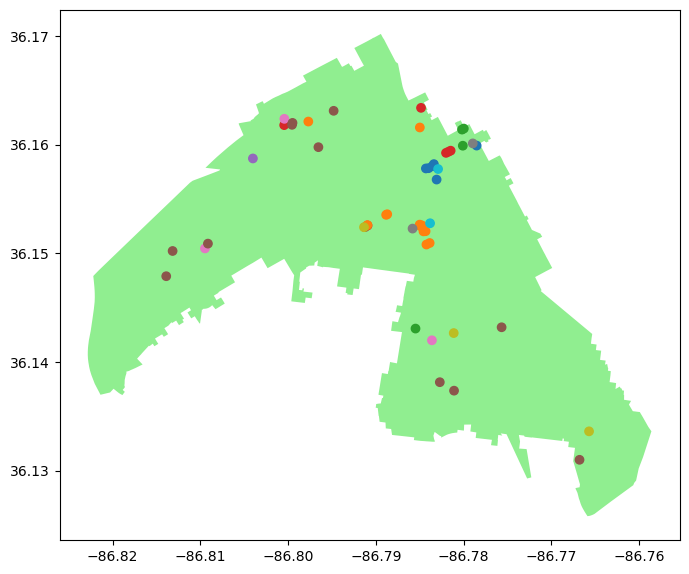

In [16]:
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_37203.plot( ax = ax, column = 'location');
plt.show();

In [19]:
center = polygon37203.geometry.centroid
print(center)

35    POINT (-86.78899 36.14860)
dtype: geometry


C:\Users\pc\AppData\Local\Temp\ipykernel_14836\1693422230.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid


In [20]:
area_center = [center.y, center.x]

print(area_center)

[35    36.148602
dtype: float64, 35   -86.788989
dtype: float64]


In [21]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

In [26]:
#draw our zip code area: 37203
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in racks_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['location'])
    icon=folium.Icon(color="purple",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')

#display our map
map_37203

In [30]:
folium.GeoJson(racks_by_zip).add_to(map_37203)

for row_index, row_values in racks_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['location'])
    icon=folium.Icon(color="purple",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    
    marker.add_to(map_37203)
map_37203

In [34]:
cluster_map_racks = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_racks)

folium.GeoJson(racks_by_zip).add_to(cluster_map_racks)

# inside the loop add each marker to the cluster
for row_index, row_values in racks_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['location'])
    icon=folium.Icon(color="purple",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)
    
cluster_map_racks

In [36]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(racks_by_zip).add_to(map_37203)

#create a list of locations and pass them to FastMarkerCluster()
locations = racks_by_zip[['lat', 'lon']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37203